# Multi classification with  Convulational Neural Network 'CNN' (Deep learning)

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [184]:
df = pd.read_csv('/content/complaints_processed.csv', index_col= 0) # The data frame already has index, so we assign index column as 0
df

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
143802,credit_reporting,may concern please immediately delete item lis...
143803,credit_reporting,may concern please immediately delete item lis...
143804,credit_reporting,may concern please immediately delete item lis...
143805,credit_reporting,may concern please immediately delete item lis...


In [185]:
df.tail(10)

,product,narrative
143797,credit_reporting,may concern please immediately delete item lis...
143798,credit_reporting,may concern please immediately delete item lis...
143799,credit_reporting,may concern please immediately delete item lis...
143800,credit_reporting,may concern please immediately delete item lis...
143801,credit_reporting,may concern please immediately delete item lis...
143802,credit_reporting,may concern please immediately delete item lis...
143803,credit_reporting,may concern please immediately delete item lis...
143804,credit_reporting,may concern please immediately delete item lis...
143805,credit_reporting,may concern please immediately delete item lis...
143806,credit_reporting,may concern please immediately delete item lis...


In [186]:
df['product'] = df['product'].apply(lambda x: x.replace("_", " "))       # To replace the underscore in the product column with space for better display

In [187]:
df['product'].value_counts()

,count
product,
credit reporting,80100
debt collection,20540
mortgages and loans,16817
credit card,14246
retail banking,12104


- ## The Dataset is not balanced, so we will balance it for model accuracy

In [188]:
# For balancing the dataset
val_c = df['product'].value_counts()
index = list(val_c.index)          # list of index (product)
count = min(val_c.values)          # the count is the minimuim value in the 'product' value count

In [189]:
count, index

(12104,
 ['credit reporting',
  'debt collection',
  'mortgages and loans',
  'credit card',
  'retail banking'])

In [190]:
# Create a balanced dataframe
df_bal = pd.concat([df[df['product'] == item].sample(count) for item in index], ignore_index=True )

In [191]:
df_bal['product'].value_counts()         # The dataset is now balanced

,count
product,
credit reporting,12104
debt collection,12104
mortgages and loans,12104
credit card,12104
retail banking,12104


In [192]:
df = pd.DataFrame(df_bal)       # replacing df_bal to our original DataFrame, df

In [193]:
df['product'].value_counts()

,count
product,
credit reporting,12104
debt collection,12104
mortgages and loans,12104
credit card,12104
retail banking,12104


# Text Preprocessing

- ### Making use of a customized text preprocessing package from my GitHub.
- ### You can find it at https://github.com/Onome-Joseph/text-preprocess.git

In [194]:
#!pip install git+https://github.com/Onome-Joseph/text-preprocess.git

In [195]:
#!pip install googletrans

In [196]:
import text_preprocess as tp     # Customized text_preprocessing pacakage

In [197]:
# Applying data cleansing and preprocessing
def text_preprocess(x):
  x = str(x).lower()
  x = tp.contraction_to_expansion(x)    # A very neccesary preprocessing that must be apllied for all NLP work.
  # x = tp.correct_spelling(x)
  x = tp.remove_emails(x)
  x = tp.remove_html_tags(x)
  x = tp.remove_rt(x)
  x = tp.remove_special_chars(x)
  x = tp.remove_urls(x)
  x = tp.remove_accented_chars(x)
  x = tp.make_base(x)

  return(x)


In [198]:
df['narrative'] = df['narrative'].apply(lambda x: text_preprocess(x))

## Importing the neccessary libraries for  Deep learning (CNN)

In [199]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

# Text tokenization

In [200]:
text = df['narrative'].tolist()

In [201]:
text

['received notice today via showing credit report shouldnt recognize account dont account affecting credit report per fair credit reporting agency please remove inacc invalid unverifiable information credit report',
 'applied credit card week ago approved today received letter mail stating reason approved many account negative standing appearing credit report looked credit report aware negative account credit report saw several account never opened account different company affiliated way allow account opened name gain anything opened name money good service benefit contribute payment might made towards account already filed police report regarding unauthorized account',
 'may concern equifax reporting inaccurate unverifiable information credit report please see account detail deemed incorrect credit file equifax hippa violation remove account number medical account reported breach hippa privacy rule validate account account number please investigate delete credit report account number

In [202]:
token = Tokenizer()
token.fit_on_texts(text)     # This will tokenize the whole text and add the whole text to our dictionary

In [203]:
vocab_size = 40000

In [204]:
encoded_text = token.texts_to_sequences(text)           # Shows the sequence(place in the text) where each word appeared
encoded_text            # list of sequences of words in each sentence

[[11,
  129,
  150,
  155,
  266,
  2,
  8,
  2576,
  1308,
  1,
  340,
  1,
  1114,
  2,
  8,
  295,
  230,
  2,
  41,
  72,
  56,
  139,
  15887,
  1205,
  1408,
  9,
  2,
  8],
 [203,
  2,
  6,
  111,
  318,
  375,
  150,
  11,
  21,
  140,
  146,
  164,
  375,
  211,
  1,
  292,
  696,
  2251,
  2,
  8,
  735,
  2,
  8,
  421,
  292,
  1,
  2,
  8,
  521,
  99,
  1,
  19,
  109,
  1,
  207,
  14,
  2428,
  156,
  432,
  1,
  109,
  70,
  1963,
  174,
  109,
  70,
  18,
  220,
  33,
  556,
  5137,
  3,
  882,
  32,
  795,
  1,
  184,
  144,
  320,
  8,
  183,
  474,
  1],
 [201,
  450,
  449,
  41,
  261,
  1408,
  9,
  2,
  8,
  56,
  75,
  1,
  441,
  1975,
  371,
  2,
  76,
  449,
  2173,
  223,
  139,
  1,
  30,
  504,
  1,
  95,
  744,
  2173,
  1286,
  837,
  665,
  1,
  1,
  30,
  56,
  466,
  515,
  2,
  8,
  1,
  30,
  228,
  3,
  302,
  2,
  329,
  53,
  120,
  3,
  697,
  8,
  482,
  412,
  2173,
  223,
  139,
  1,
  30,
  504,
  1,
  95,
  744,
  2173,
  1286,
  837,
  1

# Defining our independent (X) and dependent (y) variables

- ### The number of sequences in each sentence are of different sizes because different sentences have different number of words
- ### we will have to make is even. we will do that below

In [205]:
max_length = 350        # Maxmium number of sequences(words) that we want all the sentences to have.
# This is to ensure balance in our training and testing model
X = pad_sequences(encoded_text, maxlen=max_length, padding = 'post')
# 'padding' ensures that if the sentence size is less than 150, it will be padded with '0'

In [206]:
X       # We see that the ending of the set has 0s indicating that it didn't reach up to 350 words and padding took place

array([[  11,  129,  150, ...,    0,    0,    0],
       [ 203,    2,    6, ...,    0,    0,    0],
       [ 201,  450,  449, ...,    0,    0,    0],
       ...,
       [  84, 1787,  240, ...,    0,    0,    0],
       [ 850, 1099,  525, ...,    0,    0,    0],
       [ 109,   71,  249, ...,    0,    0,    0]], dtype=int32)

In [207]:
X.shape

(60520, 350)

In [208]:
y = df['product']
y

,product
0,credit reporting
1,credit reporting
2,credit reporting
3,credit reporting
4,credit reporting
...,...
60515,retail banking
60516,retail banking
60517,retail banking
60518,retail banking


- ## We will have to first convert the objects in y to numerical variables,
- ## And the perform 'one-hot encoding' on the numerical variables

In [209]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [210]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Convert class names to integers
y

array([1, 1, 1, ..., 4, 4, 4])

In [211]:
# One-hot encode the numeric labels
y = to_categorical(y)
y


array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

# Model building

## Splitting our data into training and testing set

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify= y)

In [213]:
vec_size = 300     # Deep learning will make a 300 dimension vector representation for all the token. so the size will be 300 (commonly used as default)
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length = max_length))

model.add(Conv1D(32, 2, activation = 'relu'))       # Applies a 1D convolutional layer with 32 filters and a kernel size of 2
model.add(MaxPooling1D(2))                         # Reduces the size of the feature map to a pool size of 2.
model.add(Dropout(0.2))                      # Drops 20% of neurons to prevent overfitting.

model.add(Dense(32, activation='relu'))       # ReLU activation for non-linear transformations.
model.add(GlobalMaxPooling1D())               # brings the sequence dimension into a single value by taking the 'maximum' value along each feature.
model.add(Dense(5, activation='softmax'))      # The output layer with 5 neurons (for 5 classes) and softmax activation for multiclass classification.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [214]:
model.compile(optimizer = Adam(learning_rate= 0.00001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [215]:
# An early stopping mechanism to stop training once the model stops improving, saving time.
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [216]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), shuffle=True)

Epoch 1/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2849 - loss: 1.5994 - val_accuracy: 0.5025 - val_loss: 1.5092
Epoch 2/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5131 - loss: 1.4666 - val_accuracy: 0.6357 - val_loss: 1.3383
Epoch 3/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6344 - loss: 1.2962 - val_accuracy: 0.6569 - val_loss: 1.1879
Epoch 4/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6619 - loss: 1.1514 - val_accuracy: 0.6854 - val_loss: 1.0499
Epoch 5/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6903 - loss: 1.0226 - val_accuracy: 0.7042 - val_loss: 0.9404
Epoch 6/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7040 - loss: 0.9251 - val_accuracy: 0.7152 - val_loss: 0.8674
Epoch 7/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7146 - loss: 0.8611 - val_accuracy: 0.7276 - val_loss: 0.8171
Epoch 8/50
1513/1513 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7208 - loss: 0

## Plotting the learning curve

In [232]:
print(history.history.keys())
epochs = 50

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


### history has 4 variables with different values for every epoch; **accuracy**, **loss**, **val_accuracy**, **val_loss**. We will display the plot for both the Model accuracy and model loss

In [233]:
def plot_learningCurve( history, epoch):
  # Plotting the training and validation accuracy values
  epoch_range = range(1, epoch+ 1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc= 'upper left')
  plt.show()

  # Plotting the training and validation loss values
  epoch_range = range(1, epoch+ 1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc= 'upper left')
  plt.show()

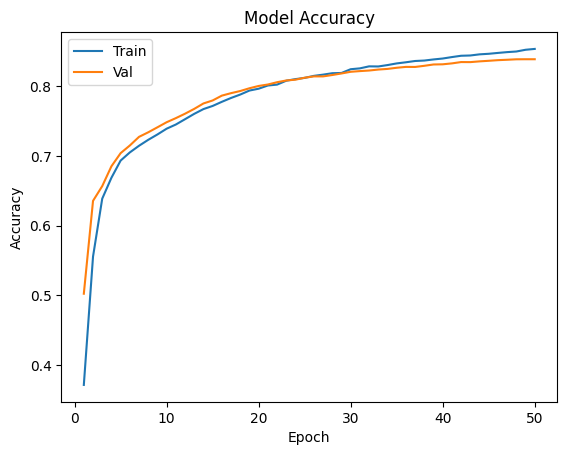

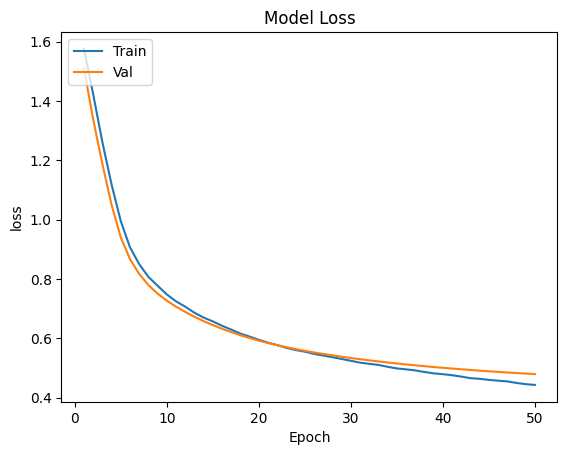

In [234]:
plot_learningCurve( history, epochs)

# Model Testing

- ## **np.argmax** is used for converting one-hot encoded predictions or labels back to their original class number

In [217]:
y_pred = np.argmax(model.predict(X_test), axis = -1)

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [218]:
y_pred

array([1, 2, 0, ..., 2, 1, 2])

- ## y_test is in the form of one hot encoding, so we to convert it its original class number

In [219]:
y_test = np.argmax(y_test, axis =-1)
y_test

array([1, 2, 0, ..., 2, 1, 2])

In [220]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      2542
           1       0.80      0.84      0.82      2299
           2       0.81      0.83      0.82      2388
           3       0.87      0.87      0.87      2420
           4       0.87      0.86      0.87      2455

    accuracy                           0.84     12104
   macro avg       0.84      0.84      0.84     12104
weighted avg       0.84      0.84      0.84     12104



## Sample Testing on our model

In [222]:
x = "I was charged for a transaction I didn't authorize and need help to resolve this issue"

In [223]:
# Function to carry out the classification
def encode(x):
  x = text_preprocess(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen = max_length, padding = 'post')
  return x

In [224]:
# predicting the sample data
prediction = np.argmax(model.predict(encode(x)), axis =-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


In [225]:
# Coverting back to the inital class for showing the result
prediction = label_encoder.inverse_transform(prediction)           # Use chatgpt to get the right code for labelencoder

In [226]:
# For displaying the results
# Loop through each prediction and input
for i, products in enumerate(prediction, start = 1):
    print(f"{i} problem: {products}")

1 problem: retail banking
